In [2]:
"""Project Overview: The project is about spatial data analysis of the vector data. Mainly, 3d projection,
   checking projection, separating the country feature from world feature, setting projection,
   plotting with basemap, plotting different features with same basemnap, spatial-join. 
   
   Data source: https://mapcruzin.com/ """


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import cartopy as ct
from cartopy import crs
import contextily as ctx


/home/hp/.local/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

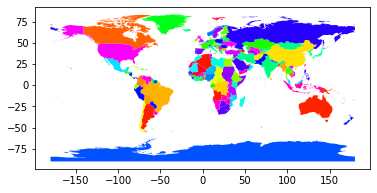

In [3]:
# At first we are importing world feature data

data = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")

# Setting the color-group as 'hav'
data.plot(cmap = 'hsv')

In [4]:
# Checking the crs
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

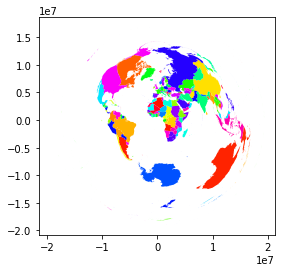

In [5]:
# Let's see the projection in 3d


cr = crs.AzimuthalEquidistant()


projection3D = cr.proj4_init

df3d = data.to_crs(projection3D)

df3d.plot(cmap = 'hsv')

<AxesSubplot:>

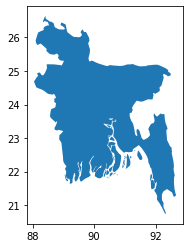

In [6]:
# Saparete Bangladesh boundary from the world feature

Bangladesh = data[data['name']=='Bangladesh']

Bangladesh.plot()

<AxesSubplot:>

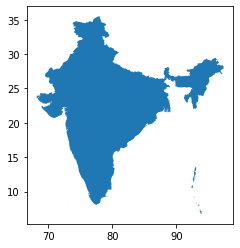

In [7]:
# Separate India Boundary from world feature

India = data[data['name']=='India']

India.plot()

<AxesSubplot:>

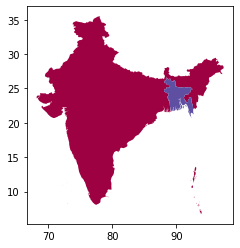

In [8]:
# Saptial join of the India and Bangladesh

India_Bangladesh =  gpd.overlay(India,Bangladesh,how = 'union')

India_Bangladesh.plot(cmap = 'Spectral')

<AxesSubplot:>

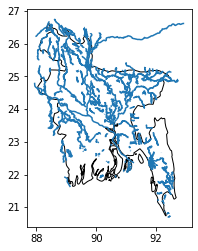

In [9]:
# Plot the waterways of Bangladesh with a basemap

data2 = gpd.read_file("waterways/waterways.shp")

# Set the similar (Similar to the world-feature) crs 
data2.set_crs(data.crs)

base = Bangladesh.plot(color = 'w', edgecolor = 'k')

data2.plot(ax = base)



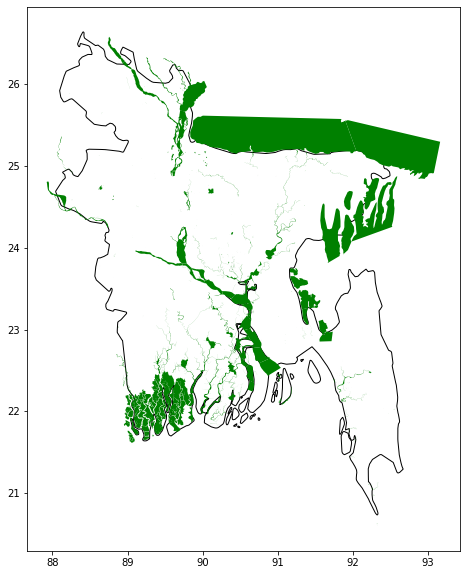

In [10]:
# Plot the Natural feature in or around the Bangladesh with a basemap

data3 = gpd.read_file("natural/natural.shp")

data3.set_crs(data.crs)

fig,ax = plt.subplots(figsize = (10,10))

bd = Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')
na = data3.plot(ax = ax, color = 'g')




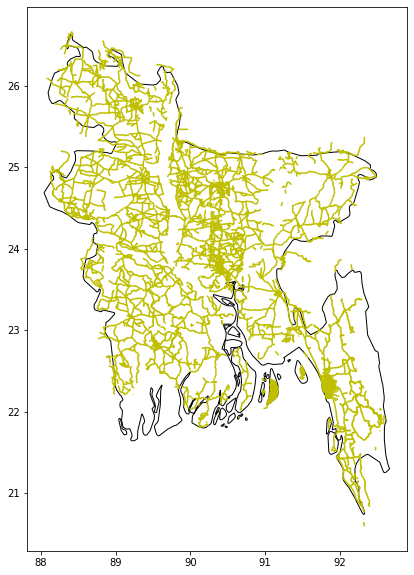

In [11]:
# Plot the road-ways of Bangladesh with a basemap

data4 = gpd.read_file("roads/roads.shp")

data4.set_crs(data.crs)

fig, ax = plt.subplots(figsize = (10,10))

bd = Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')
rw = data4.plot(ax = ax, color = 'y')


Text(0.5, 1.0, 'Road, natural feature and river-system of Bangladesh')

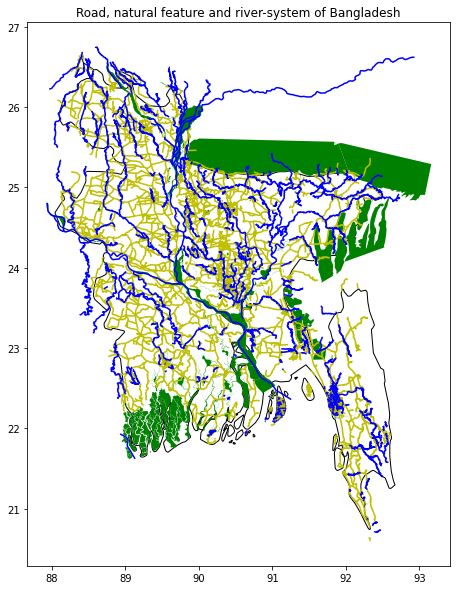

In [14]:
# Plot the three different features (road, natural, water-way) on the same basemap of Bangladesh

fig, ax = plt.subplots(figsize = (10,10))

bd = Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')
rw = data4.plot(ax = ax, color = 'y')
na = data3.plot(ax = ax, color = 'g')
ww = data2.plot(ax = ax, color = 'b')

ax.set_title("Road, natural feature and river-system of Bangladesh")

# Yellow corresponded to 'Roads', green corresponded to 'Natural feature' and blue corresponded to 'River system'


<AxesSubplot:>

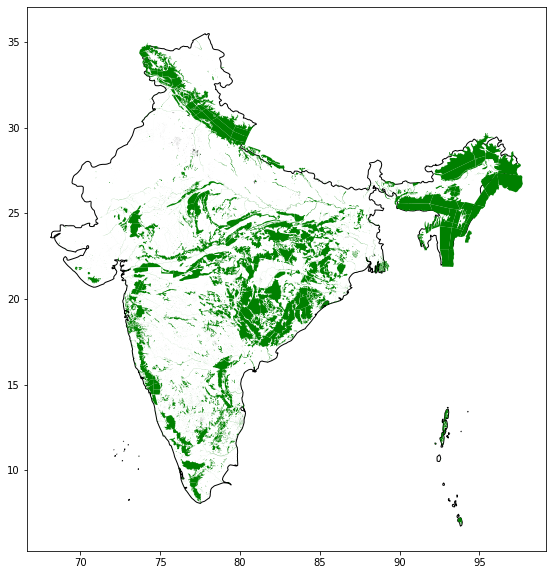

In [13]:
# Plot the natural-feature of India with a basemap

data5= gpd.read_file("natural2/natural.shp")

data5.set_crs(data.crs)

fig, ax = plt.subplots(figsize = (10,10))

bd = India.plot(ax = ax, color = 'w', edgecolor = 'k')

data5.plot(ax = ax, color = 'g')

<AxesSubplot:>

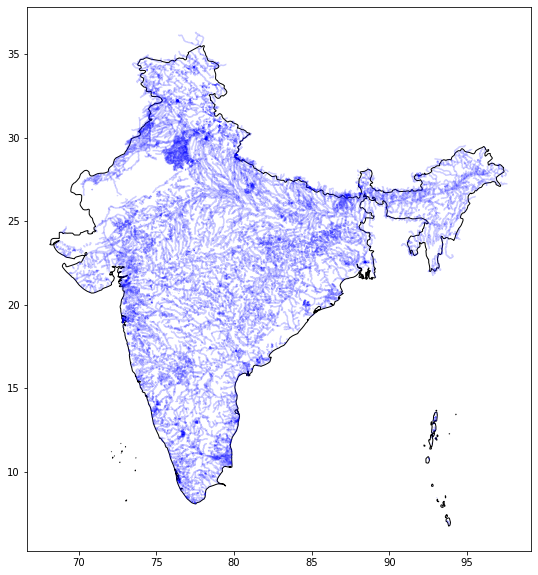

In [15]:
# Plot the inland water-body of India with a basemap

data6= gpd.read_file("waterwaysIn/waterways.shp")

data6.set_crs(data.crs)

fig, ax = plt.subplots(figsize = (10,10))

bd = India.plot(ax = ax, color = 'w', edgecolor = 'k')

data6.plot(ax = ax, color = 'b', alpha = 0.2)

<AxesSubplot:>

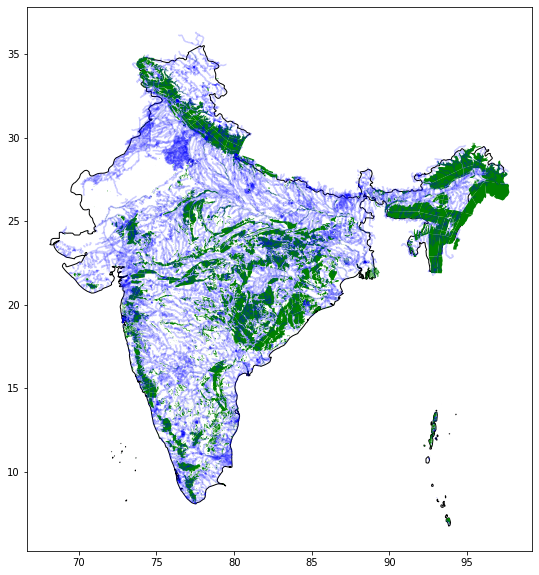

In [16]:
# Plot the two different features (natural, water-way) on the same basemap of India

fig, ax = plt.subplots(figsize = (10,10))

bd = India.plot(ax = ax, color = 'w', edgecolor = 'k')

data5.plot(ax = ax, color = 'g')
data6.plot(ax = ax, color = 'b', alpha = 0.2)

<AxesSubplot:>

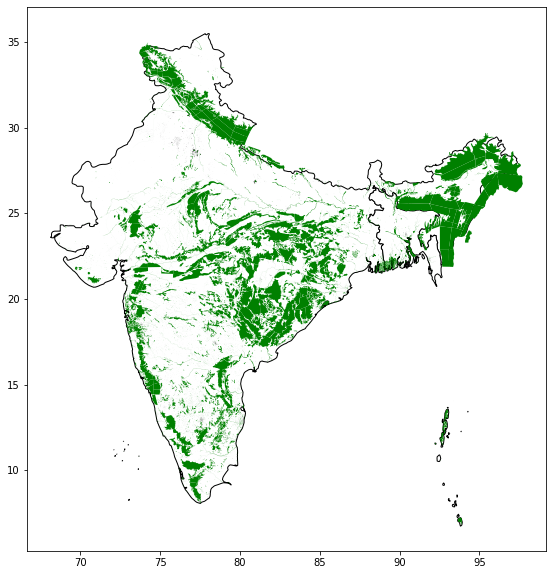

In [17]:
# Spatial join of the natural feature of India and Bangladesh

naIndBD = gpd.overlay(data5,data3, how = 'union')

fig, ax = plt.subplots(figsize = (10,10))

bd = India_Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')
naIndBD.plot(ax = ax, color = 'g')

/home/hp/.local/lib/python3.8/site-packages/geopandas/plotting.py:204: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  collection = LineCollection(segments, **kwargs)


<AxesSubplot:>

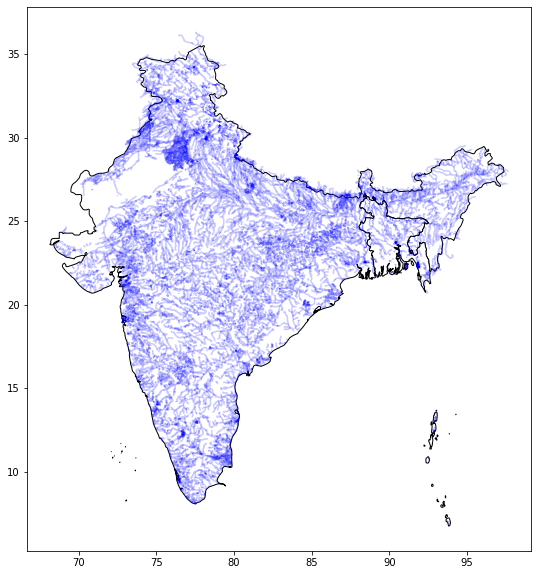

In [18]:
# Spatial join of the Inland water-body of India and Bangladesh

wwIndBD = gpd.overlay(data6, data2, how = 'union')

fig, ax = plt.subplots(figsize = (10,10))

bd = India_Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')
wwIndBD.plot(ax = ax, color = 'b', Alpha  = 0.2)

Text(0.5, 1.0, 'Natural feature and inland water of the India and Bangladesh')

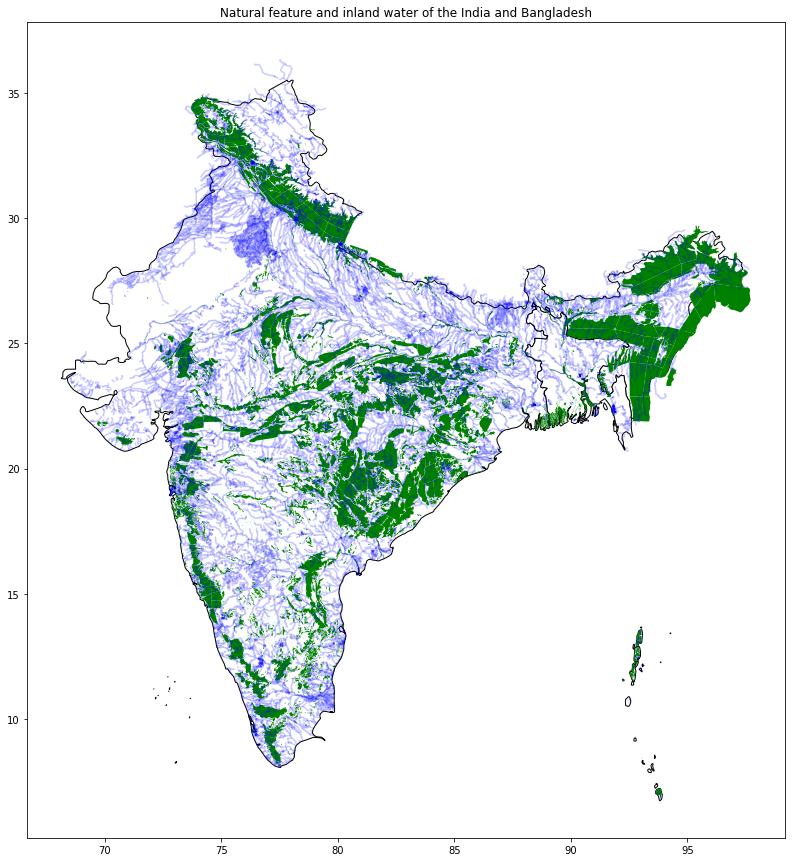

In [19]:
# Spatail join of the natural feature and inland water of India and Bangladesh

fig, ax = plt.subplots(figsize = (15,15))

bd = India_Bangladesh.plot(ax = ax, color = 'w', edgecolor = 'k')

naIndBD.plot(ax = ax, color = 'g')
wwIndBD.plot(ax = ax, color = 'b', alpha = 0.2)

ax.set_title("Natural feature and inland water of the India and Bangladesh")

# Green corresponded to the natural feature and Blue corresponded to the Inland water.